In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import os

In [3]:
files= os.listdir(r'.')

In [4]:
for i in files:
    if i.endswith('.csv'):
        print(i)

california_county_population.csv
us-counties.csv
us-states.csv


In [5]:
df_cov= pd.read_csv('us-counties.csv')

In [6]:
df_cov.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [7]:
df_cov.describe()

,fips,cases,deaths
count,741374.000000,748502.000000,748502.000000
mean,31221.651339,1416.594723,45.318400
std,16283.698442,7720.669399,429.987902
min,1001.000000,0.000000,0.000000
25%,18177.000000,25.000000,0.000000
50%,29205.000000,147.000000,2.000000
75%,46095.000000,663.000000,15.000000
max,78030.000000,353316.000000,24167.000000


In [8]:
la_case=df_cov[df_cov['county'].values == 'Los Angeles']

In [9]:
la_case

,date,county,state,fips,cases,deaths
9,2020-01-26,Los Angeles,California,6037.0,1,0
14,2020-01-27,Los Angeles,California,6037.0,1,0
19,2020-01-28,Los Angeles,California,6037.0,1,0
24,2020-01-29,Los Angeles,California,6037.0,1,0
29,2020-01-30,Los Angeles,California,6037.0,1,0
...,...,...,...,...,...,...
732474,2020-11-15,Los Angeles,California,6037.0,339640,7269
735720,2020-11-16,Los Angeles,California,6037.0,342425,7275
738965,2020-11-17,Los Angeles,California,6037.0,344607,7299
742212,2020-11-18,Los Angeles,California,6037.0,348420,7335


([<matplotlib.axis.XTick at 0x2b8228ed0d0>,
 <a list of 6 Text major ticklabel objects>)

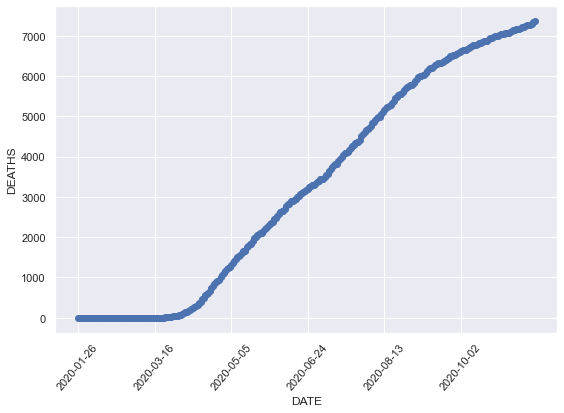

In [10]:
plt.scatter(la_case['date'], la_case['deaths'])
plt.xlabel('DATE', fontsize=12)
plt.ylabel('DEATHS', fontsize=12)
plt.gcf().set_size_inches(9,6)
plt.xticks(np.arange(0, 300, 50), rotation=50)

# CHECKING if there are NULL values

In [11]:
#for i in range(len(df_cov)):
#    print(df_cov.columns[i], ":", df_cov[df_cov.columns[i]].isnull().values.any())

# GETTING THE counties of california only

In [12]:
cali_county= df_cov[(df_cov['state'].values == 'California') & (df_cov['cases'].values > 1000)]

In [13]:
cali_county.head(5)

,date,county,state,fips,cases,deaths
12489,2020-03-26,Los Angeles,California,6037.0,1216,21
14155,2020-03-27,Los Angeles,California,6037.0,1465,27
15937,2020-03-28,Los Angeles,California,6037.0,1804,33
17826,2020-03-29,Los Angeles,California,6037.0,2136,37
19803,2020-03-30,Los Angeles,California,6037.0,2474,44


# CALI COUNTIES

In [14]:
cali_county.describe()

,fips,cases,deaths
count,6126.000000,6126.000000,6126.000000
mean,6062.477636,17395.544727,349.811133
std,30.704066,38687.855259,925.300261
min,6001.000000,1001.000000,1.000000
25%,6037.000000,2492.500000,40.000000
50%,6067.000000,6728.500000,99.000000
75%,6085.000000,16129.250000,286.000000
max,6115.000000,353316.000000,7363.000000


In [15]:
cali_county['county'].unique()

array(['Los Angeles', 'Santa Clara', 'San Diego', 'Riverside', 'Orange',
       'San Francisco', 'Alameda', 'San Bernardino', 'Sacramento',
       'San Mateo', 'Kern', 'Contra Costa', 'Santa Barbara', 'Tulare',
       'Fresno', 'Imperial', 'Ventura', 'Kings', 'San Joaquin',
       'Stanislaus', 'Monterey', 'Marin', 'Sonoma', 'Solano', 'Merced',
       'Placer', 'Madera', 'San Luis Obispo', 'Yolo', 'Santa Cruz',
       'Butte', 'Napa', 'Sutter', 'San Benito', 'El Dorado', 'Yuba',
       'Shasta', 'Mendocino', 'Tehama', 'Lassen'], dtype=object)

In [16]:
cali_county_columns= cali_county['county'].unique()

# DEATH records, stats

In [17]:
cali_county.sort_values(by= ['cases'])

,date,county,state,fips,cases,deaths
499089,2020-09-04,El Dorado,California,6017.0,1001,2
502323,2020-09-05,El Dorado,California,6017.0,1001,2
596232,2020-10-04,Mendocino,California,6045.0,1005,20
271604,2020-06-25,Sonoma,California,6097.0,1006,5
274745,2020-06-26,Sonoma,California,6097.0,1006,5
...,...,...,...,...,...,...
732474,2020-11-15,Los Angeles,California,6037.0,339640,7269
735720,2020-11-16,Los Angeles,California,6037.0,342425,7275
738965,2020-11-17,Los Angeles,California,6037.0,344607,7299
742212,2020-11-18,Los Angeles,California,6037.0,348420,7335


# COUNTIES with most infected CASE

In [18]:
cali_county[cali_county['cases'].values > 90000]

,date,county,state,fips,cases,deaths
271575,2020-06-25,Los Angeles,California,6037.0,91467,3246
274716,2020-06-26,Los Angeles,California,6037.0,93232,3267
277865,2020-06-27,Los Angeles,California,6037.0,95371,3285
281014,2020-06-28,Los Angeles,California,6037.0,97894,3305
284162,2020-06-29,Los Angeles,California,6037.0,100772,3326
...,...,...,...,...,...,...
732474,2020-11-15,Los Angeles,California,6037.0,339640,7269
735720,2020-11-16,Los Angeles,California,6037.0,342425,7275
738965,2020-11-17,Los Angeles,California,6037.0,344607,7299
742212,2020-11-18,Los Angeles,California,6037.0,348420,7335


# visualizatoin

([<matplotlib.axis.XTick at 0x2b823bbaee0>,
 <a list of 4 Text major ticklabel objects>)

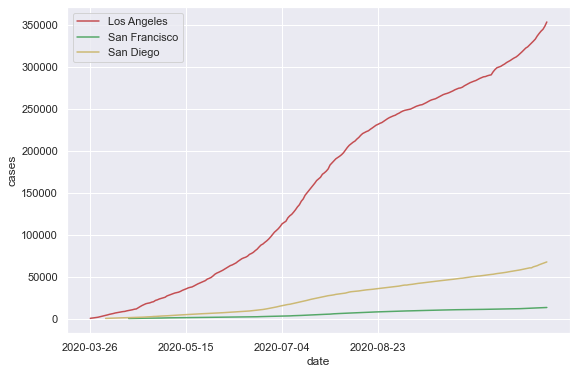

In [19]:
sns.lineplot((cali_county['date'][cali_county['county'].values == 'Los Angeles']), (cali_county['cases'][cali_county['county'].values == 'Los Angeles']), color='r', label='Los Angeles' )
sns.lineplot((cali_county['date'][cali_county['county'].values == 'San Francisco']), (cali_county['cases'][cali_county['county'].values == 'San Francisco']) , color='g', label='San Francisco')
sns.lineplot((cali_county['date'][cali_county['county'].values == 'San Diego']), (cali_county['cases'][cali_county['county'].values == 'San Diego']) , color='y', label='San Diego')
#sns.lineplot((cali_county['date'][cali_county['county'].values == 'Orange']), (cali_county['cases'][cali_county['county'].values == 'Orange']) , color='blue', label='Orange')

plt.gcf().set_size_inches(9,6)
plt.xticks(np.arange(0, 200, 50))

# PUPULATION Census of 2020
- SOURCE:
   https://worldpopulationreview.com/us-counties/states/ca

In [20]:
df_cali_pop= pd.read_csv('california_county_population.csv')

In [21]:
df_cali_pop.head(5)

,CTYNAME,pop2020,GrowthRate
0,Los Angeles County,10079000,2.6121
1,San Diego County,3379160,8.8889
2,Orange County,3198000,6.0148
3,Riverside County,2517830,14.3610
4,San Bernardino County,2208400,8.2066


In [22]:
df_cali_pop.columns[0]

'CTYNAME'

In [23]:
353316/10079000 # TOTAL infected

0.03505466812183748

([<matplotlib.axis.XTick at 0x2b8220852e0>,
 <a list of 8 Text major ticklabel objects>)

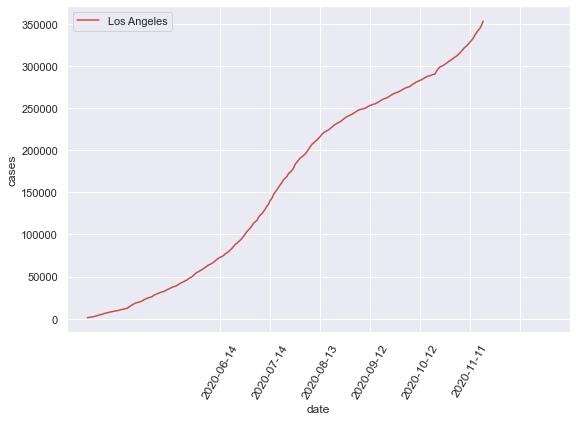

In [24]:
sns.lineplot((cali_county['date'][cali_county['county'].values == 'Los Angeles']), (cali_county['cases'][cali_county['county'].values == 'Los Angeles']), color='r', label='Los Angeles' )
#plt.scatter(df_cali_pop['CTYNAME'][df_cali_pop['CTYNAME'].values == 'Los Angeles County'], 10079000)
plt.gcf().set_size_inches(9,6)
plt.xticks(np.arange(80, 300, 30), rotation= 60, fontsize= 12)

# REPLACING the city NAMES

In [25]:
df_cali_pop.head(3)

,CTYNAME,pop2020,GrowthRate
0,Los Angeles County,10079000,2.6121
1,San Diego County,3379160,8.8889
2,Orange County,3198000,6.0148


In [26]:
df_cali_pop['CTYNAME']

0         Los Angeles County
1           San Diego County
2              Orange County
3           Riverside County
4      San Bernardino County
5         Santa Clara County
6             Alameda County
7          Sacramento County
8        Contra Costa County
9              Fresno County
10               Kern County
11      San Francisco County
12            Ventura County
13        San Joaquin County
14          San Mateo County
15         Stanislaus County
16             Sonoma County
17             Tulare County
18             Solano County
19      Santa Barbara County
20           Monterey County
21             Placer County
22    San Luis Obispo County
23             Merced County
24         Santa Cruz County
25              Marin County
26              Butte County
27               Yolo County
28          El Dorado County
29           Imperial County
30             Shasta County
31             Madera County
32              Kings County
33               Napa County
34           H

In [27]:
df_cali_pop['CTYNAME']= df_cali_pop['CTYNAME'].replace(df_cali_pop['CTYNAME'])

In [28]:
df_cali_pop.head(5)

,CTYNAME,pop2020,GrowthRate
0,Los Angeles County,10079000,2.6121
1,San Diego County,3379160,8.8889
2,Orange County,3198000,6.0148
3,Riverside County,2517830,14.3610
4,San Bernardino County,2208400,8.2066
